# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Vincentius Raditya Agung Soedomo
- **Email:** v.raditya05@gmail.com
- **ID Dicoding:** radityasoedomo

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan hari libur dalam periode waktu tertentu
- Bagaimana kondisi cuaca dan perubahan musim memengaruhi jumlah penyewaan sepeda secara signifikan dalam jangka waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd

day_csv = pd.read_csv('data/day.csv')
hour_csv = pd.read_csv('data/hour.csv')

print("Day.csv data:")
print(day_csv)
print("Hour.csv data:")
print(hour_csv)

Day.csv data:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registe

## Data Wrangling

GATHERING DATA CASE 1

In [5]:
# Load datasets
hour_data = pd.read_csv('data/hour.csv')  # Memastikan file hour.csv ada
day_data = pd.read_csv('data/day.csv')    # Memastikan file day.csv ada

# Gathering data: Selecting relevant columns
columns_needed = ['dteday', 'holiday', 'workingday', 'weekday', 'cnt', 'casual', 'registered']

# Subset of hour.csv
hour_data_subset = hour_data[columns_needed]

# Aggregating hour data to daily level
hour_aggregated = hour_data_subset.groupby(['dteday', 'holiday', 'workingday', 'weekday']).sum().reset_index()

# Subset of day.csv
day_data_subset = day_data[columns_needed]

# Combine the two datasets
combined_data = pd.concat([hour_aggregated, day_data_subset]).drop_duplicates().reset_index(drop=True)

pd.set_option('display.max_rows', None)  # None means display all rows
pd.set_option('display.max_columns', None)  # Display all columns as well

# Display first few rows of combined data
print("Gathered Data:\n", combined_data)

Gathered Data:
          dteday  holiday  workingday  weekday   cnt  casual  registered
0    2011-01-01        0           0        6   985     331         654
1    2011-01-02        0           0        0   801     131         670
2    2011-01-03        0           1        1  1349     120        1229
3    2011-01-04        0           1        2  1562     108        1454
4    2011-01-05        0           1        3  1600      82        1518
5    2011-01-06        0           1        4  1606      88        1518
6    2011-01-07        0           1        5  1510     148        1362
7    2011-01-08        0           0        6   959      68         891
8    2011-01-09        0           0        0   822      54         768
9    2011-01-10        0           1        1  1321      41        1280
10   2011-01-11        0           1        2  1263      43        1220
11   2011-01-12        0           1        3  1162      25        1137
12   2011-01-13        0           1        4  1

**Insight:**
- Didapatkan pada data, mayoritas penggunaan sepeda lebih banyak pada hari kerja/ hari biasa

GATHERING DATA CASE 2

In [6]:
# Gathering data: Selecting relevant columns related to weather
columns_needed_hour = ['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
columns_needed_day = ['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Subset of hour.csv
hour_data_subset = hour_data[columns_needed_hour]

# Aggregating hour data to daily level by taking average of weather conditions and sum of bike counts
hour_aggregated = hour_data_subset.groupby(['dteday', 'weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'cnt': 'sum'
}).reset_index()

# Subset of day.csv
day_data_subset = day_data[columns_needed_day]

# Combine the two datasets
combined_weather_data = pd.concat([hour_aggregated, day_data_subset]).drop_duplicates().reset_index(drop=True)

# Display first few rows of combined data
pd.set_option('display.max_rows', None)  # None means display all rows
pd.set_option('display.max_columns', None)  # Display all columns as well
print("Gathered Data on Weather Impact:\n", combined_weather_data)


Gathered Data on Weather Impact:
           dteday  weathersit      temp     atemp       hum  windspeed   cnt
0     2011-01-01           1  0.275000  0.310600  0.785000   0.068408   305
1     2011-01-01           2  0.412000  0.415140  0.816000   0.252240   608
2     2011-01-01           3  0.420000  0.424200  0.880000   0.253700    72
3     2011-01-02           1  0.280000  0.260100  0.455000   0.298517   165
4     2011-01-02           2  0.401667  0.393917  0.793333   0.240042   417
5     2011-01-02           3  0.372000  0.369680  0.752000   0.208960   219
6     2011-01-03           1  0.196364  0.189405  0.437273   0.248309  1349
7     2011-01-04           1  0.201818  0.215564  0.585909   0.152655  1520
8     2011-01-04           2  0.160000  0.136400  0.690000   0.328400    42
9     2011-01-05           1  0.226957  0.229270  0.436957   0.186900  1600
10    2011-01-06           1  0.218667  0.248493  0.480667   0.071653  1225
11    2011-01-06           2  0.177500  0.204550  0.58

**Insight:**
- Berdasarkan data diatas didapatkan jumlah pengguna sepeda lebih banyak pada kondisi cuaca yang baik (nomor 1) dan dengan nilai suhu yang normal (tidak panas maupun dingin)

ASSESSMENT DATA & CLEANING DATA CASE 1

In [7]:
# Load datasets
hour_data = pd.read_csv('data/hour.csv')  # Memastikan file hour.csv ada
day_data = pd.read_csv('data/day.csv')    # Memastikan file day.csv ada

# Gathering data: Selecting relevant columns
columns_needed = ['dteday', 'holiday', 'workingday', 'weekday', 'cnt', 'casual', 'registered']

# Subset of hour.csv
hour_data_subset = hour_data[columns_needed]

# Aggregating hour data to daily level
hour_aggregated = hour_data_subset.groupby(['dteday', 'holiday', 'workingday', 'weekday']).sum().reset_index()

# Subset of day.csv
day_data_subset = day_data[columns_needed]

# Combine the two datasets
combined_data = pd.concat([hour_aggregated, day_data_subset]).drop_duplicates().reset_index(drop=True)

# Cek missing values
print("Missing values:\n", combined_data.isnull().sum())

# Cek duplikasi
print("Number of duplicate rows:", combined_data.duplicated().sum())

# Ubah tipe data ke datetime
combined_data['dteday'] = pd.to_datetime(combined_data['dteday'])

# Cek nilai negatif
invalid_values = combined_data[(combined_data['cnt'] < 0) |
                               (combined_data['casual'] < 0) |
                               (combined_data['registered'] < 0)]
print("Invalid values:\n", invalid_values)

# Cek nilai unik di kolom categorical
print("Unique values in 'holiday':", combined_data['holiday'].unique())
print("Unique values in 'workingday':", combined_data['workingday'].unique())
print("Unique values in 'weekday':", combined_data['weekday'].unique())

# Hapus baris dengan nilai invalid jika ada
combined_data = combined_data[~combined_data.index.isin(invalid_values.index)]

# Tampilkan preview cleaned data
print("Cleaned Data:\n", combined_data)


Missing values:
 dteday        0
holiday       0
workingday    0
weekday       0
cnt           0
casual        0
registered    0
dtype: int64
Number of duplicate rows: 0
Invalid values:
 Empty DataFrame
Columns: [dteday, holiday, workingday, weekday, cnt, casual, registered]
Index: []
Unique values in 'holiday': [0 1]
Unique values in 'workingday': [0 1]
Unique values in 'weekday': [6 0 1 2 3 4 5]
Cleaned Data:
         dteday  holiday  workingday  weekday   cnt  casual  registered
0   2011-01-01        0           0        6   985     331         654
1   2011-01-02        0           0        0   801     131         670
2   2011-01-03        0           1        1  1349     120        1229
3   2011-01-04        0           1        2  1562     108        1454
4   2011-01-05        0           1        3  1600      82        1518
5   2011-01-06        0           1        4  1606      88        1518
6   2011-01-07        0           1        5  1510     148        1362
7   2011-01-08  

**Insight:**
- Tidak ada missing value pada data tersebut
- Didapatkan pada data, mayoritas penggunaan sepeda lebih banyak pada hari kerja/ hari biasa

ASSESSMENT DATA & CLEANING DATA CASE 2

In [8]:
# Load datasets
hour_data = pd.read_csv('data/hour.csv')  # Pastikan file hour.csv ada
day_data = pd.read_csv('data/day.csv')    # Pastikan file day.csv ada

# 1. Gathering data: Selecting relevant columns related to weather impact
columns_needed_hour = ['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
columns_needed_day = ['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Subset of hour.csv
hour_data_subset = hour_data[columns_needed_hour]

# 2. Aggregating hour data to daily level by taking average of weather conditions and sum of bike counts
hour_aggregated = hour_data_subset.groupby(['dteday', 'weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'cnt': 'sum'
}).reset_index()

# Subset of day.csv
day_data_subset = day_data[columns_needed_day]

# 3. Combine the two datasets
combined_weather_data = pd.concat([hour_aggregated, day_data_subset]).drop_duplicates().reset_index(drop=True)

# 4. Data cleaning

# Check missing values
print("Missing values:\n", combined_weather_data.isnull().sum())

# Check duplicate rows
print("Number of duplicate rows:", combined_weather_data.duplicated().sum())

# Convert 'dteday' to datetime
combined_weather_data['dteday'] = pd.to_datetime(combined_weather_data['dteday'])

# Check for negative values in relevant columns
invalid_values = combined_weather_data[(combined_weather_data['cnt'] < 0) |
                                       (combined_weather_data['temp'] < 0) |
                                       (combined_weather_data['atemp'] < 0) |
                                       (combined_weather_data['hum'] < 0) |
                                       (combined_weather_data['windspeed'] < 0)]

print("Invalid values:\n", invalid_values)

# Remove rows with invalid values if any
combined_weather_data = combined_weather_data[~combined_weather_data.index.isin(invalid_values.index)]

# 5. Further checks on categorical columns (for day_data)
print("Unique values in 'weathersit':", combined_weather_data['weathersit'].unique())

# 6. Display cleaned data
print("Cleaned Data:\n", combined_weather_data)

# Optional: Save the cleaned dataset to a CSV file for further analysis
combined_weather_data.to_csv('cleaned_weather_data.csv', index=False)


Missing values:
 dteday        0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
Number of duplicate rows: 0
Invalid values:
 Empty DataFrame
Columns: [dteday, weathersit, temp, atemp, hum, windspeed, cnt]
Index: []
Unique values in 'weathersit': [1 2 3 4]
Cleaned Data:
          dteday  weathersit      temp     atemp       hum  windspeed   cnt
0    2011-01-01           1  0.275000  0.310600  0.785000   0.068408   305
1    2011-01-01           2  0.412000  0.415140  0.816000   0.252240   608
2    2011-01-01           3  0.420000  0.424200  0.880000   0.253700    72
3    2011-01-02           1  0.280000  0.260100  0.455000   0.298517   165
4    2011-01-02           2  0.401667  0.393917  0.793333   0.240042   417
5    2011-01-02           3  0.372000  0.369680  0.752000   0.208960   219
6    2011-01-03           1  0.196364  0.189405  0.437273   0.248309  1349
7    2011-01-04           1  0.201818  0.215564  0.585909   0.15265

**Insight:**
- Tidak ada missing value mauapun kesalahan lain pada data tersebut
- Berdasarkan data diatas, lebih pesepeda menaiki sepedanya pada kondisi cuaca yang normal dengan suhu dan kecepatan angin yang normal

## Exploratory Data Analysis (EDA)

### Explore
- Impact of Working Days vs. Holidays
- Impact of Day of the Week
- Bike Rental Trends Over Time
- Weather’s Impact on Bike Rentals
- Seasonal Impact on Bike Rentals

CASE 1

In [9]:
# 1. General Statistical Description
print("Descriptive Statistics:\n", combined_data.describe())

# 2. Analysis of Rentals Based on Working Days and Holidays
avg_rentals_workingday = combined_data.groupby('workingday')['cnt'].mean()
avg_rentals_holiday = combined_data.groupby('holiday')['cnt'].mean()

print("\nAverage Bike Rentals on Working Days vs. Non-Working Days:")
print(avg_rentals_workingday)

print("\nAverage Bike Rentals on Holidays vs. Non-Holidays:")
print(avg_rentals_holiday)

# 3. Analysis Based on Day of the Week
avg_rentals_by_weekday = combined_data.groupby('weekday')['cnt'].mean()
print("\nAverage Bike Rentals by Day of the Week (0 = Sunday, 6 = Saturday):")
print(avg_rentals_by_weekday)

# 4. Time Trend Analysis
total_rentals_by_date = combined_data.groupby('dteday')['cnt'].sum()
print("\nTotal Bike Rentals Over Time:")
print(total_rentals_by_date.head(10))  # Print first 10 dates for brevity

# 5. Comparison of Casual and Registered Bike Users
total_casual = combined_data['casual'].sum()
total_registered = combined_data['registered'].sum()

print("\nTotal Casual vs. Registered Bike Rentals:")
print(f"Casual Users: {total_casual}")
print(f"Registered Users: {total_registered}")

# 6. Correlation Between Variables
correlation_matrix = combined_data[['cnt', 'casual', 'registered', 'holiday', 'workingday', 'weekday']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Descriptive Statistics:
                     dteday     holiday  workingday     weekday          cnt  \
count                  731  731.000000  731.000000  731.000000   731.000000   
mean   2012-01-01 00:00:00    0.028728    0.683995    2.997264  4504.348837   
min    2011-01-01 00:00:00    0.000000    0.000000    0.000000    22.000000   
25%    2011-07-02 12:00:00    0.000000    0.000000    1.000000  3152.000000   
50%    2012-01-01 00:00:00    0.000000    1.000000    3.000000  4548.000000   
75%    2012-07-01 12:00:00    0.000000    1.000000    5.000000  5956.000000   
max    2012-12-31 00:00:00    1.000000    1.000000    6.000000  8714.000000   
std                    NaN    0.167155    0.465233    2.004787  1937.211452   

            casual   registered  
count   731.000000   731.000000  
mean    848.176471  3656.172367  
min       2.000000    20.000000  
25%     315.500000  2497.000000  
50%     713.000000  3662.000000  
75%    1096.000000  4776.500000  
max    3410.000000  6946.

**Insight:**
- Rata - rata penggunaan sepeda pada hari kerja adalah 4584
- Rata - rata penggunaan sepeda pada hari libur adalah 4330

CASE 2

In [10]:
import numpy as np

# Load the datasets
day_data = pd.read_csv("data/day.csv")
hour_data = pd.read_csv("data/hour.csv")

# EDA for day.csv
print("---- EDA for day.csv ----")
print("\nData Information:")
print(day_data.info())

print("\nSummary Statistics:")
print(day_data.describe())

print("\nNumber of null values per column:")
print(day_data.isnull().sum())

# Distribution of Bike Usage by Season
print("\nDistribution of bike usage by season:")
season_counts = day_data.groupby('season')['cnt'].mean()
print(season_counts)

# Distribution of Bike Usage on Working Days vs Weekends
print("\nDistribution of bike usage on working days and weekends:")
workingday_counts = day_data.groupby('workingday')['cnt'].mean()
print(workingday_counts)

# Distribution of Bike Usage by Weather Conditions
print("\nDistribution of bike usage by weather conditions:")
weather_counts = day_data.groupby('weathersit')['cnt'].mean()
print(weather_counts)

# Correlation between variables (excluding 'dteday' column)
print("\nCorrelation between variables:")
correlation = day_data.drop(columns=['dteday']).corr()  # Exclude 'dteday'
print(correlation['cnt'].sort_values(ascending=False))

# EDA for hour.csv
print("\n---- EDA for hour.csv ----")
print("\nData Information:")
print(hour_data.info())

print("\nSummary Statistics:")
print(hour_data.describe())

print("\nNumber of null values per column:")
print(hour_data.isnull().sum())

# Distribution of Bike Usage by Season (Hourly Data)
print("\nDistribution of bike usage by season (hourly data):")
season_counts_hour = hour_data.groupby('season')['cnt'].mean()
print(season_counts_hour)

# Distribution of Bike Usage by Weather Conditions (Hourly Data)
print("\nDistribution of bike usage by weather conditions (hourly data):")
weather_counts_hour = hour_data.groupby('weathersit')['cnt'].mean()
print(weather_counts_hour)

# Correlation between variables (hour.csv) excluding irrelevant columns
print("\nCorrelation between variables:")
correlation_hour = hour_data.drop(columns=['dteday', 'hr']).corr()
print(correlation_hour['cnt'].sort_values(ascending=False))


# Explanatory Analysis:
# Impact of weather on bike usage
print("\n---- Explanatory Analysis ----")

# Impact of weather (weathersit) on bike usage
print("\nImpact of weather on bike usage:")
print("Clear weather (weathersit 1):", weather_counts[1])
print("Cloudy/misty weather (weathersit 2):", weather_counts[2])
print("Light rain/snow weather (weathersit 3):", weather_counts[3])

# Impact of temperature on bike usage
print("\nImpact of temperature (temp) on bike usage:")
temp_correlation = day_data[['temp', 'cnt']].corr()
print("Correlation between temperature and bike usage:", temp_correlation.loc['temp', 'cnt'])

# Impact of humidity and wind speed on bike usage
print("\nImpact of humidity and wind speed on bike usage:")
hum_wind_correlation = day_data[['hum', 'windspeed', 'cnt']].corr()
print("Correlation between humidity and bike usage:", hum_wind_correlation.loc['hum', 'cnt'])
print("Correlation between wind speed and bike usage:", hum_wind_correlation.loc['windspeed', 'cnt'])

# Season with highest and lowest bike usage
print("\nSeason with highest and lowest bike usage:")
season_max = season_counts.idxmax()
season_min = season_counts.idxmin()
print(f"Season with highest bike usage: {season_max}, average {season_counts[season_max]} bikes")
print(f"Season with lowest bike usage: {season_min}, average {season_counts[season_min]} bikes")


---- EDA for day.csv ----

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Summary Statistics:
          instant     

**Insight:**
- Rata - rata penggunaan sepeda pada cuaca cerah adalah 4876 pesepeda
- Rata - rata penggunaan sepeda pada cuaca berkabut adalah 4035 pesepeda
- Rata - rata penggunaan sepeda pada cuaca hujan/ salju ringan adalah 1803 pesepeda
- Musim dengan penggunaan sepeda tertinggi: 3, dengan rata-rata 5644 sepeda
- Musim dengan penggunaan sepeda terendah: 1, dengan rata-rata 2604 sepeda

## Visualization & Explanatory Analysis

CASE 1

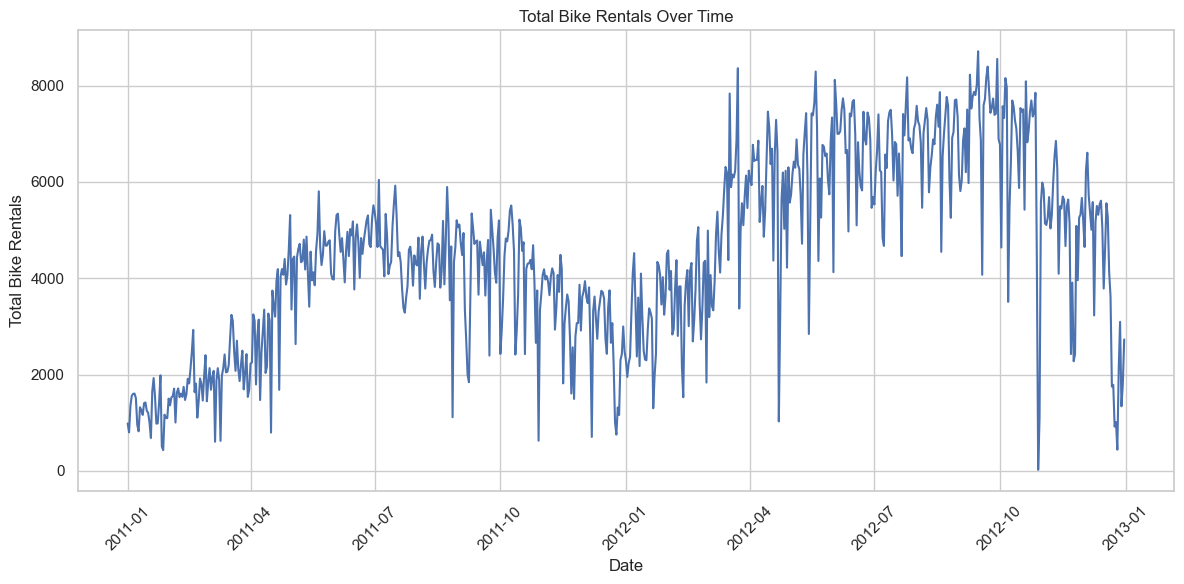

C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\1373634936.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rentals_workingday.index, y=avg_rentals_workingday.values, palette=colors)


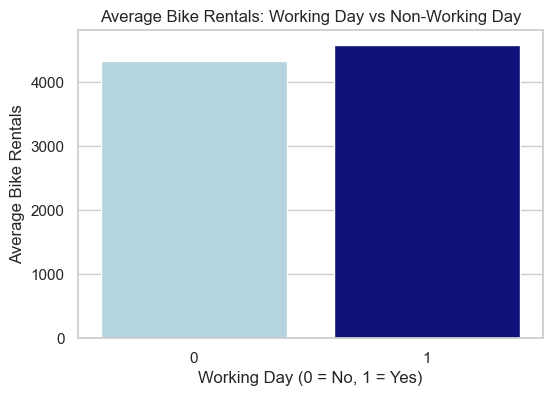

C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\1373634936.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rentals_by_weekday.index, y=avg_rentals_by_weekday.values, palette=colors_weekday)


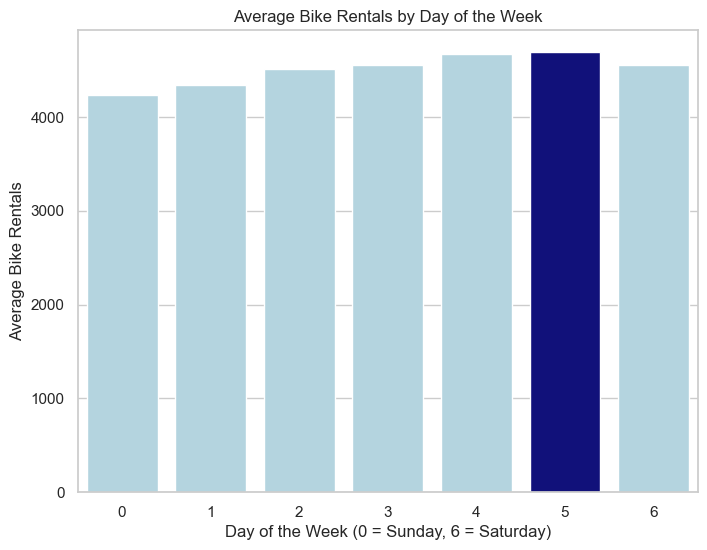

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style for seaborn
sns.set(style="whitegrid")

# Plot total bike rentals over time
plt.figure(figsize=(12, 6))
plt.plot(combined_data['dteday'], combined_data['cnt'], label="Total Rentals", color='b')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average rentals on working days vs non-working days
avg_rentals_workingday = combined_data.groupby('workingday')['cnt'].mean()

# Find the max value and apply color mapping
max_value = avg_rentals_workingday.max()
colors = ['lightblue' if value < max_value else 'darkblue' for value in avg_rentals_workingday.values]

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rentals_workingday.index, y=avg_rentals_workingday.values, palette=colors)
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals: Working Day vs Non-Working Day')
plt.show()

# Plot average rentals by day of the week
avg_rentals_by_weekday = combined_data.groupby('weekday')['cnt'].mean()

# Find the max value and apply color mapping
max_value_weekday = avg_rentals_by_weekday.max()
colors_weekday = ['lightblue' if value < max_value_weekday else 'darkblue' for value in avg_rentals_by_weekday.values]

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rentals_by_weekday.index, y=avg_rentals_by_weekday.values, palette=colors_weekday)
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Day of the Week')
plt.show()

**Insight:**
- Berdasarkan data diatas dapat dilihat, terdapat jumlah paling banyak perentalan sepeda dalam kurun waktu tertentu, yaitu sebesar lebih dari 8000 perental
- Jumlah paling banyak, para perental sepeda dalam merental sepeda, yaitu dilakukan pada hari kerja (hari biasa), dimana hari Kamis dan Jumat merupakan hari yang paling banyak diketahui perental sepedanya

CASE 2

C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\1384945028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=colors_weather)
C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\1384945028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors_season)


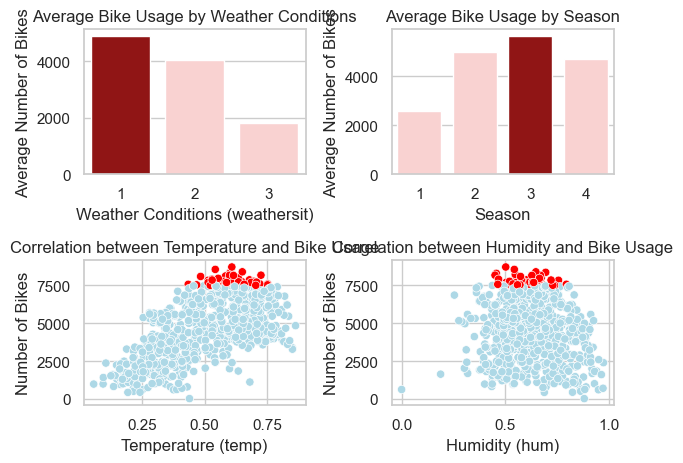

In [18]:
# Visualization of Bike Usage Distribution by Weather Conditions
plt.subplot(2, 2, 1)
max_weather_value = weather_counts.max()
colors_weather = ['#FFCCCB' if value < max_weather_value else '#A50000' for value in weather_counts.values]  # light red and dark red
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=colors_weather)
plt.title("Average Bike Usage by Weather Conditions")
plt.xlabel("Weather Conditions (weathersit)")
plt.ylabel("Average Number of Bikes")

# Visualization of Bike Usage by Season
plt.subplot(2, 2, 2)
max_season_value = season_counts.max()
colors_season = ['#FFCCCB' if value < max_season_value else '#A50000' for value in season_counts.values]  # light red and dark red
sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors_season)
plt.title("Average Bike Usage by Season")
plt.xlabel("Season")
plt.ylabel("Average Number of Bikes")

# Visualization of Correlation between Temperature and Bike Usage
plt.subplot(2, 2, 3)
# Setting colors based on condition
colors_temp = ['red' if value > 7500 else 'lightblue' for value in day_data['cnt']]
sns.scatterplot(data=day_data, x='temp', y='cnt', color=colors_temp)  # Color based on value
plt.title("Correlation between Temperature and Bike Usage")
plt.xlabel("Temperature (temp)")
plt.ylabel("Number of Bikes")

# Visualization of Correlation between Humidity and Bike Usage
plt.subplot(2, 2, 4)
# Setting colors based on condition
colors_hum = ['red' if value > 7500 else 'lightblue' for value in day_data['cnt']]
sns.scatterplot(data=day_data, x='hum', y='cnt', color=colors_hum)  # Color based on value
plt.title("Correlation between Humidity and Bike Usage")
plt.xlabel("Humidity (hum)")
plt.ylabel("Number of Bikes")

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan data diatas dapat dilihat, terdapat jumlah paling banyak pengguna sepeda dalam cuaca normal (nomor 1), yaitu sebesar lebih dari 4500 pesepeda
- Jumlah paling banyak, para pesepeda dalam menggunakan sepeda, yang dilakukan pada musim tertentu (nomor 3), yaitu terdapat lebih dari 5000 pesepeda
- Jumlah pengguna sepeda pun juga akan meningkat ketika suhu sekitar (lingkungan) dalam kondisi normal, tidak kepanasan maupun kedinginan
- Jumlah pengguna sepeda juga akan meningkat ketika kelembapan sekitar (lingkungan) dalam kondisi normal, tidak terlalu lembap maupun kering

## RFM ANALYSIS

CASE 1

In [17]:
import pandas as pd

# Load cleaned dataset
day_data = pd.read_csv('data/day.csv')
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Step 1: Calculate Recency
last_date = day_data['dteday'].max()
day_data['Recency'] = (last_date - day_data['dteday']).dt.days

# Step 2: Calculate Frequency based on user segments
# Define user segments: daily renters, weekend renters, sporadic renters
day_data['User_Segment'] = day_data.apply(lambda row: 'Daily' if row['workingday'] == 1 
                                          else ('Weekend' if row['weekday'] in [5, 6] else 'Sporadic'), axis=1)

# Frequency calculation based on User Segment
frequency_segment = day_data.groupby('User_Segment')['cnt'].count().reset_index(name='Frequency')

# Step 3: Calculate Monetary based on User Segment
monetary_segment = day_data.groupby('User_Segment')['cnt'].sum().reset_index(name='Monetary')

# Merge all RFM metrics for user segments
rfm_segment = day_data[['dteday', 'Recency', 'User_Segment']].drop_duplicates()
rfm_segment = rfm_segment.merge(frequency_segment, on='User_Segment')
rfm_segment = rfm_segment.merge(monetary_segment, on='User_Segment')

# Rank RFM values
rfm_segment['R_rank'] = rfm_segment['Recency'].rank(ascending=False)
rfm_segment['F_rank'] = rfm_segment['Frequency'].rank(ascending=True)
rfm_segment['M_rank'] = rfm_segment['Monetary'].rank(ascending=True)

# Final RFM score
rfm_segment['RFM_score'] = rfm_segment['R_rank'] + rfm_segment['F_rank'] + rfm_segment['M_rank']

# Save the refined RFM analysis results to CSV
rfm_segment.to_csv('rfm_analysis_bike_sharing_segments.csv', index=False)

# Print RFM result
print("RFM Analysis Result (Top 10):")
print(rfm_segment.head(10))

# Print summary statistics
print("\nSummary of RFM Analysis:")
print(rfm_segment.describe())


RFM Analysis Result (Top 10):
      dteday  Recency User_Segment  Frequency  Monetary  R_rank  F_rank  \
0 2011-01-01      730      Weekend        107    484301     1.0    54.0   
1 2011-01-02      729     Sporadic        124    515968     2.0   169.5   
2 2011-01-03      728        Daily        500   2292410     3.0   481.5   
3 2011-01-04      727        Daily        500   2292410     4.0   481.5   
4 2011-01-05      726        Daily        500   2292410     5.0   481.5   
5 2011-01-06      725        Daily        500   2292410     6.0   481.5   
6 2011-01-07      724        Daily        500   2292410     7.0   481.5   
7 2011-01-08      723      Weekend        107    484301     8.0    54.0   
8 2011-01-09      722     Sporadic        124    515968     9.0   169.5   
9 2011-01-10      721        Daily        500   2292410    10.0   481.5   

   M_rank  RFM_score  
0    54.0      109.0  
1   169.5      341.0  
2   481.5      966.0  
3   481.5      967.0  
4   481.5      968.0  
5   48

CASE 2

In [18]:
import pandas as pd

# Load the cleaned dataset
day_data = pd.read_csv('data/day.csv')

# Convert 'dteday' to datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Step 1: Calculate Recency
last_date = day_data['dteday'].max()
day_data['Recency'] = (last_date - day_data['dteday']).dt.days

# Step 2: Calculate Frequency based on weather and season
frequency_weather = day_data.groupby('weathersit')['cnt'].count().reset_index(name='Frequency_Weather')
frequency_season = day_data.groupby('season')['cnt'].count().reset_index(name='Frequency_Season')

# Step 3: Calculate Monetary based on weather and season
monetary_weather = day_data.groupby('weathersit')['cnt'].sum().reset_index(name='Monetary_Weather')
monetary_season = day_data.groupby('season')['cnt'].sum().reset_index(name='Monetary_Season')

# Merge all RFM metrics for weather
rfm_weather = day_data[['dteday', 'Recency', 'weathersit']].drop_duplicates()
rfm_weather = rfm_weather.merge(frequency_weather, on='weathersit')
rfm_weather = rfm_weather.merge(monetary_weather, on='weathersit')

# Merge all RFM metrics for season
rfm_season = day_data[['dteday', 'Recency', 'season']].drop_duplicates()
rfm_season = rfm_season.merge(frequency_season, on='season')
rfm_season = rfm_season.merge(monetary_season, on='season')

# Ranking for weather
rfm_weather['R_rank'] = rfm_weather['Recency'].rank(ascending=False)
rfm_weather['F_rank'] = rfm_weather['Frequency_Weather'].rank(ascending=True)
rfm_weather['M_rank'] = rfm_weather['Monetary_Weather'].rank(ascending=True)

# Ranking for season
rfm_season['R_rank'] = rfm_season['Recency'].rank(ascending=False)
rfm_season['F_rank'] = rfm_season['Frequency_Season'].rank(ascending=True)
rfm_season['M_rank'] = rfm_season['Monetary_Season'].rank(ascending=True)

# Final RFM score for both weather and season
rfm_weather['RFM_score'] = rfm_weather['R_rank'] + rfm_weather['F_rank'] + rfm_weather['M_rank']
rfm_season['RFM_score'] = rfm_season['R_rank'] + rfm_season['F_rank'] + rfm_season['M_rank']

# Save to CSV
rfm_weather.to_csv('rfm_analysis_bike_sharing_weather.csv', index=False)
rfm_season.to_csv('rfm_analysis_bike_sharing_season.csv', index=False)

# Display the RFM Data for weather and season
print("RFM Analysis for Weather Conditions:\n", rfm_weather.head(10))
print("\nRFM Analysis for Seasons:\n", rfm_season.head(10))

RFM Analysis for Weather Conditions:
       dteday  Recency  weathersit  Frequency_Weather  Monetary_Weather  \
0 2011-01-01      730           2                247            996858   
1 2011-01-02      729           2                247            996858   
2 2011-01-03      728           1                463           2257952   
3 2011-01-04      727           1                463           2257952   
4 2011-01-05      726           1                463           2257952   
5 2011-01-06      725           1                463           2257952   
6 2011-01-07      724           2                247            996858   
7 2011-01-08      723           2                247            996858   
8 2011-01-09      722           1                463           2257952   
9 2011-01-10      721           1                463           2257952   

   R_rank  F_rank  M_rank  RFM_score  
0     1.0   145.0   145.0      291.0  
1     2.0   145.0   145.0      292.0  
2     3.0   500.0   500.0     

## VISUALISASI RFM ANALYSIS

CASE 1

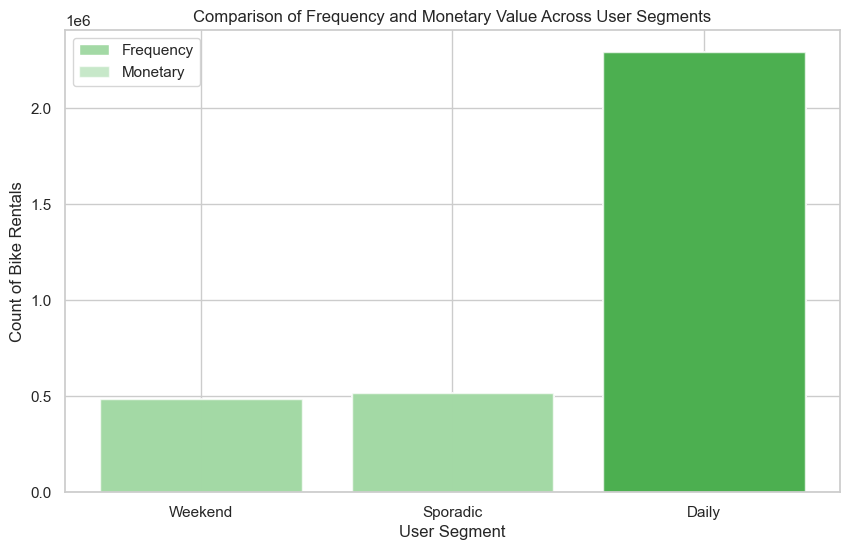

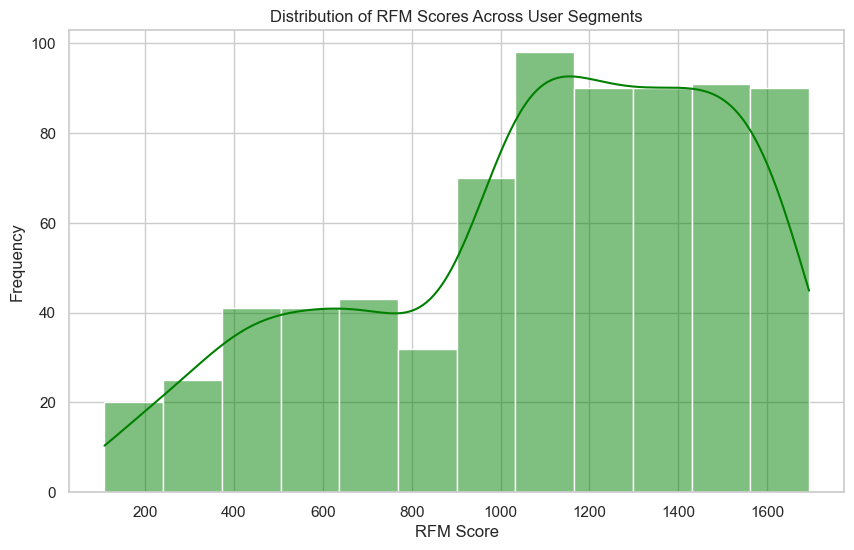

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the refined RFM analysis result
rfm_segment = pd.read_csv('rfm_analysis_bike_sharing_segments.csv')

# Bar Plot: Frequency and Monetary by User Segment
plt.figure(figsize=(10, 6))
max_frequency = rfm_segment['Frequency'].max()
max_monetary = rfm_segment['Monetary'].max()

# Setting colors based on condition
colors_frequency = ['#A3D9A5' if value < max_frequency else '#4CAF50' for value in rfm_segment['Frequency']]  # light green for lower values, dark green for the highest
colors_monetary = ['#A3D9A5' if value < max_monetary else '#4CAF50' for value in rfm_segment['Monetary']]  # light green for lower values, dark green for the highest

# Creating the bar plots
plt.bar(rfm_segment['User_Segment'], rfm_segment['Frequency'], color=colors_frequency, label='Frequency')
plt.bar(rfm_segment['User_Segment'], rfm_segment['Monetary'], color=colors_monetary, label='Monetary', alpha=0.6)  # Slightly transparent for overlap visibility
plt.title('Comparison of Frequency and Monetary Value Across User Segments')
plt.xlabel('User Segment')
plt.ylabel('Count of Bike Rentals')
plt.legend()
plt.show()

# Distribution of RFM Scores by User Segment
plt.figure(figsize=(10, 6))
sns.histplot(rfm_segment['RFM_score'], kde=True, color='green')
plt.title('Distribution of RFM Scores Across User Segments')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.show()

INSIGHT:
- Penyewa Harian (Daily Renters): Ini adalah kelompok pengguna yang paling aktif, dengan frekuensi dan nilai moneter yang tinggi. Pengguna ini kemungkinan besar menggunakan sepeda untuk keperluan transportasi sehari-hari atau pekerjaan.
- Penyewa Akhir Pekan (Weekend Renters): Kelompok ini memiliki frekuensi yang lebih rendah dibandingkan penyewa harian tetapi tetap memiliki volume yang signifikan. Hal ini mencerminkan pengguna yang lebih berorientasi pada kegiatan rekreasi, kemungkinan besar menggunakan layanan sepeda untuk berlibur atau bersantai di akhir pekan.
- Penyewa Sporadis (Sporadic Renters): Kelompok ini memiliki frekuensi dan nilai moneter terendah. Mereka menggunakan layanan secara tidak teratur, mungkin hanya untuk acara tertentu atau kebutuhan satu kali.

CASE 2

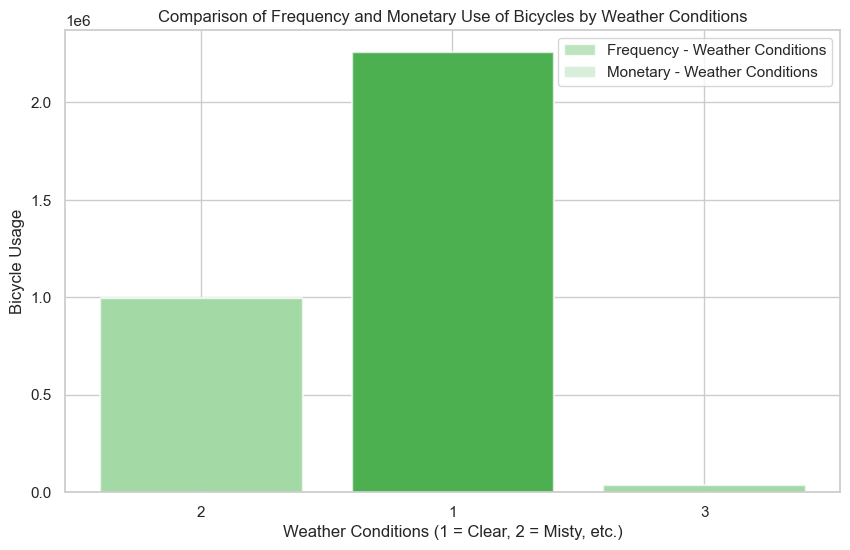

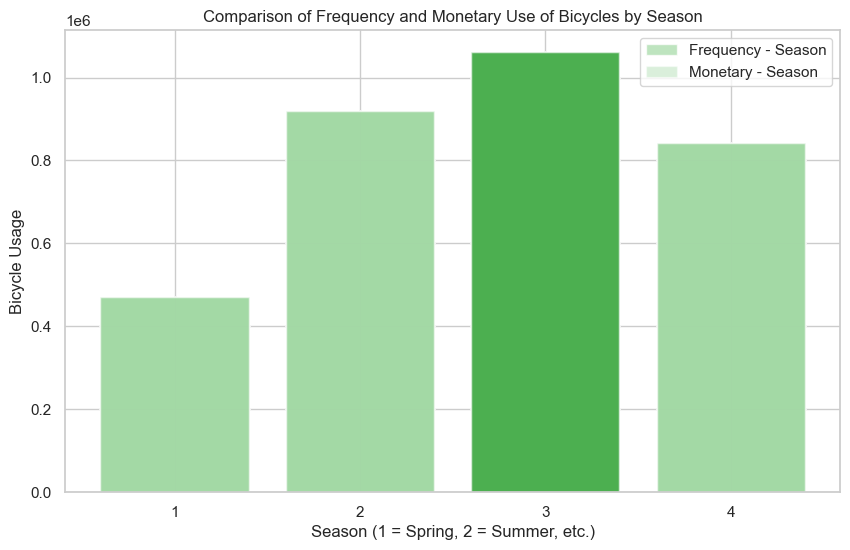

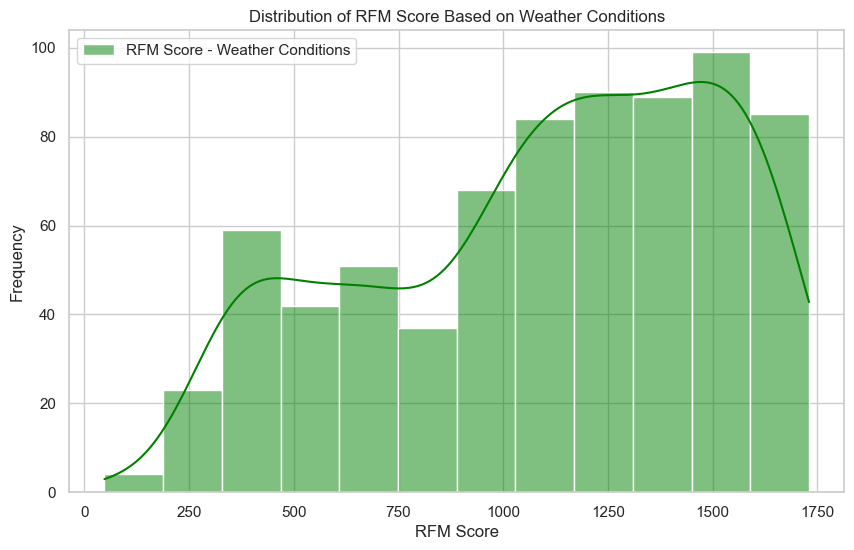

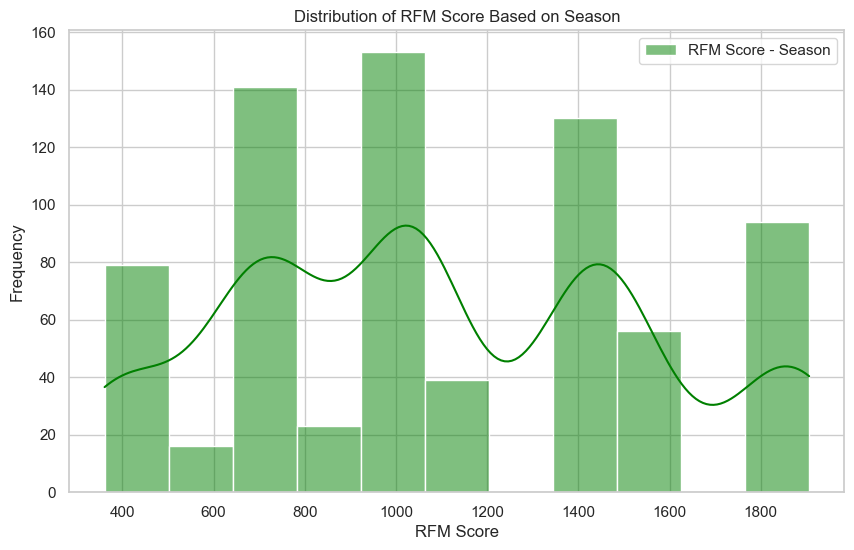

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the RFM datasets for weather and season
rfm_weather = pd.read_csv('rfm_analysis_bike_sharing_weather.csv')
rfm_season = pd.read_csv('rfm_analysis_bike_sharing_season.csv')

# Visualization 1: Bar Plot - Frequency and Monetary by Weather Conditions
plt.figure(figsize=(10, 6))
max_frequency_weather = rfm_weather['Frequency_Weather'].max()
max_monetary_weather = rfm_weather['Monetary_Weather'].max()

# Setting colors based on conditions
colors_weather_frequency = ['#A3D9A5' if value < max_frequency_weather else '#4CAF50' for value in rfm_weather['Frequency_Weather']]
colors_weather_monetary = ['#A3D9A5' if value < max_monetary_weather else '#4CAF50' for value in rfm_weather['Monetary_Weather']]

# Creating the bar plots
plt.bar(rfm_weather['weathersit'].astype(str), rfm_weather['Frequency_Weather'], color=colors_weather_frequency, label='Frequency - Weather Conditions', alpha=0.7)
plt.bar(rfm_weather['weathersit'].astype(str), rfm_weather['Monetary_Weather'], color=colors_weather_monetary, label='Monetary - Weather Conditions', alpha=0.4)  # Slightly transparent for overlap visibility
plt.title('Comparison of Frequency and Monetary Use of Bicycles by Weather Conditions')
plt.xlabel('Weather Conditions (1 = Clear, 2 = Misty, etc.)')
plt.ylabel('Bicycle Usage')
plt.legend()
plt.show()

# Visualization 2: Bar Plot - Frequency and Monetary by Season
plt.figure(figsize=(10, 6))
max_frequency_season = rfm_season['Frequency_Season'].max()
max_monetary_season = rfm_season['Monetary_Season'].max()

# Setting colors based on conditions
colors_season_frequency = ['#A3D9A5' if value < max_frequency_season else '#4CAF50' for value in rfm_season['Frequency_Season']]
colors_season_monetary = ['#A3D9A5' if value < max_monetary_season else '#4CAF50' for value in rfm_season['Monetary_Season']]

# Creating the bar plots
plt.bar(rfm_season['season'].astype(str), rfm_season['Frequency_Season'], color=colors_season_frequency, label='Frequency - Season', alpha=0.7)
plt.bar(rfm_season['season'].astype(str), rfm_season['Monetary_Season'], color=colors_season_monetary, label='Monetary - Season', alpha=0.4)  # Slightly transparent for overlap visibility
plt.title('Comparison of Frequency and Monetary Use of Bicycles by Season')
plt.xlabel('Season (1 = Spring, 2 = Summer, etc.)')
plt.ylabel('Bicycle Usage')
plt.legend()
plt.show()

# Visualization 3: Distribution of RFM Score - Weather Conditions
plt.figure(figsize=(10, 6))
sns.histplot(rfm_weather['RFM_score'], color='green', label='RFM Score - Weather Conditions', kde=True)
plt.title('Distribution of RFM Score Based on Weather Conditions')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization 4: Distribution of RFM Score - Season
plt.figure(figsize=(10, 6))
sns.histplot(rfm_season['RFM_score'], color='green', label='RFM Score - Season', kde=True)
plt.title('Distribution of RFM Score Based on Season')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

INSIGHT:
- Kondisi Cuaca: Penggunaan sepeda meningkat secara signifikan pada kondisi cuaca cerah. Data menunjukkan bahwa orang lebih cenderung bersepeda pada hari-hari dengan cuaca yang baik, mencerminkan potensi peningkatan pengguna pada hari-hari tersebut.
- Cuaca Berkabut: Meskipun ada penurunan frekuensi dan total penggunaan pada kondisi cuaca berkabut, masih terdapat pengguna yang tetap bersepeda, menunjukkan bahwa beberapa orang tetap aktif meskipun cuaca tidak ideal.
- Hujan sebagai Penghambat: Data menunjukkan bahwa penggunaan sepeda pada hari hujan sangat minim. Ini menunjukkan bahwa cuaca hujan adalah faktor utama yang menghambat pengguna dalam menggunakan layanan sepeda.
- Optimasi pada Hari Cerah: Mengoptimalkan layanan sepeda pada hari-hari cerah dapat meningkatkan jumlah pengguna. Hal ini dapat dilakukan dengan meningkatkan ketersediaan sepeda atau layanan lainnya pada waktu-waktu tersebut.
- Fasilitas saat Cuaca Buruk: Menciptakan fasilitas yang lebih baik saat cuaca buruk, seperti penyediaan perlengkapan hujan atau insentif, dapat membantu mempertahankan jumlah pengguna meskipun dalam kondisi cuaca yang kurang ideal.

## CLUSTERING

CASE 1

Rental Distribution by Category:
  Rental_Category  Count
0        Very Low      1
1             Low      0
2          Medium      0
3            High      2
4       Very High     16
5         Extreme    712


C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\2976221414.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rental_Category', y='Count', data=rental_distribution, palette=colors)


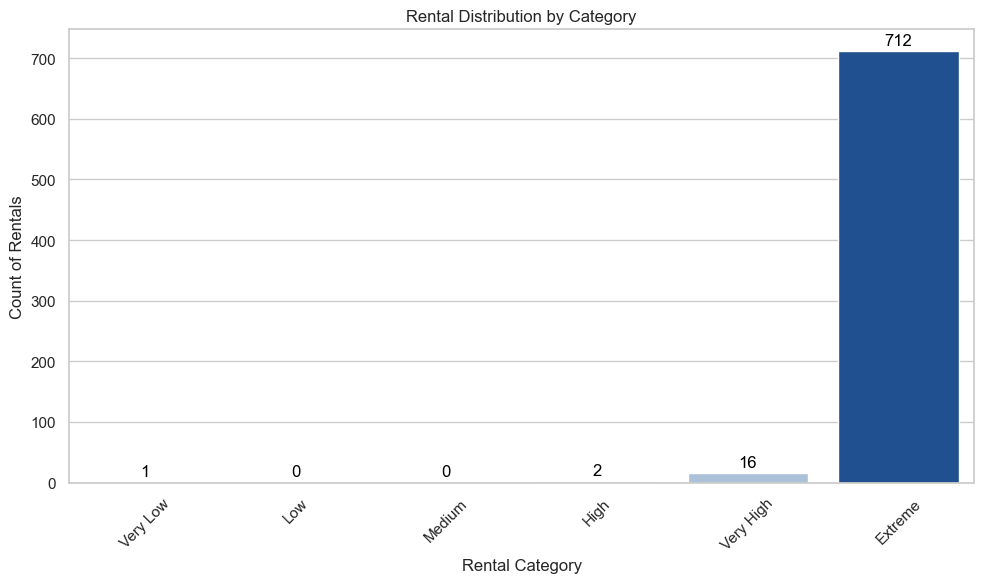

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
day_data = pd.read_csv('data/day.csv')

# Group by rental count ranges (Binning)
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme']
day_data['Rental_Category'] = pd.cut(day_data['cnt'], bins=bins, labels=labels, ordered=True)

# Count the number of rentals in each category
rental_distribution = day_data['Rental_Category'].value_counts().reindex(labels).reset_index()
rental_distribution.columns = ['Rental_Category', 'Count']

# Print the rental distribution
print("Rental Distribution by Category:")
print(rental_distribution)

# Find the maximum count
max_count = rental_distribution['Count'].max()

# Define colors based on conditions
colors = ['#A3C1E0' if count < max_count else '#0E4DA4' for count in rental_distribution['Count']]

# Visualize rental distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Rental_Category', y='Count', data=rental_distribution, palette=colors)
plt.title('Rental Distribution by Category')
plt.xlabel('Rental Category')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=45)

# Add text annotations for the counts on the bars with a slight offset
for index, row in rental_distribution.iterrows():
    plt.text(index, row['Count'] + 10, row['Count'], color='black', ha='center')

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


INSIGHT:
- Kategori "Ekstrem" menunjukkan jumlah sewa yang sangat tinggi (712), menandakan bahwa ada banyak hari dengan permintaan sewa sepeda yang sangat tinggi. Ini bisa menunjukkan adanya faktor-faktor tertentu yang mendorong lonjakan permintaan, seperti acara khusus atau kondisi cuaca yang mendukung.
- Kategori "Sangat Rendah" hanya memiliki 1 sewa, dan kategori "Rendah," "Sedang" tidak mencatatkan sewa sama sekali. Ini mengindikasikan bahwa ada hari-hari tertentu ketika penggunaan sepeda sangat minim, yang mungkin disebabkan oleh cuaca buruk, hari libur, atau faktor lainnya.
- Dengan banyaknya hari yang tidak terpakai (kategori "Sangat Rendah" dan "Rendah"), ini menunjukkan adanya potensi untuk melakukan kampanye pemasaran atau promosi pada hari-hari tersebut untuk meningkatkan penggunaan sepeda.
- Dengan adanya pola sewa yang ekstrem, manajemen perlu memastikan ketersediaan sepeda yang cukup pada hari-hari dengan permintaan tinggi. Hal ini penting untuk meningkatkan kepuasan pelanggan dan meminimalisir antrian.
- Mengingat banyaknya sewa pada kategori "Ekstrem," perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor penyebabnya. Misalnya, menganalisis cuaca, lokasi, dan waktu sewa untuk mendapatkan wawasan yang lebih dalam.

CASE 2

RFM Category Distribution for Weather Conditions:
      RFM_Category  Count
0  Very High Value    511
1     Medium Value    116
2       High Value     93
3        Low Value     11

RFM Category Distribution for Seasons:
      RFM_Category  Count
0  Very High Value    472
1       High Value    180
2     Medium Value     79


C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\2374746570.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Category', y='Count', data=weather_category_distribution, palette=weather_colors, dodge=False)
C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\2374746570.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


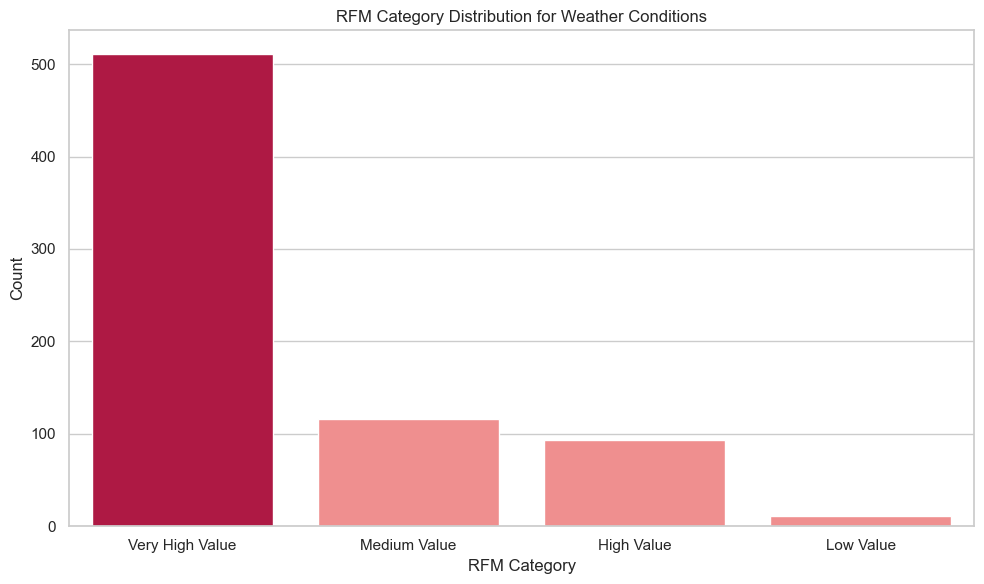

C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\2374746570.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Category', y='Count', data=season_category_distribution, palette=season_colors, dodge=False)
C:\Users\Slim 3\AppData\Local\Temp\ipykernel_20888\2374746570.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


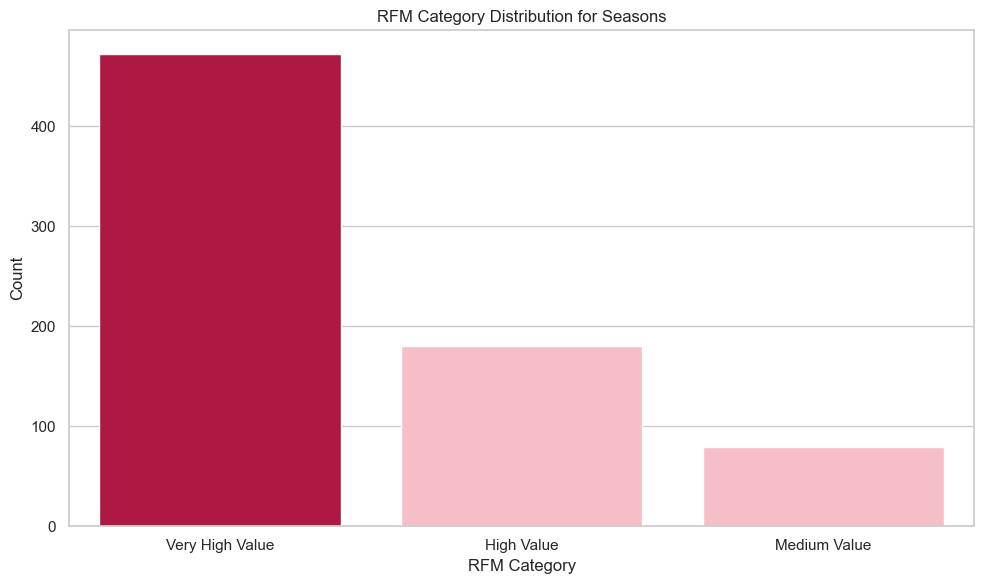

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the RFM datasets for weather and season
rfm_weather = pd.read_csv('rfm_analysis_bike_sharing_weather.csv')
rfm_season = pd.read_csv('rfm_analysis_bike_sharing_season.csv')

# Function to categorize RFM scores
def categorize_rfm_score(rfm_score):
    if rfm_score <= 300:
        return 'Low Value'
    elif 301 <= rfm_score <= 600:
        return 'Medium Value'
    elif 601 <= rfm_score <= 900:
        return 'High Value'
    elif rfm_score > 900:
        return 'Very High Value'

# Apply the categorization function to RFM scores for weather and season
rfm_weather['RFM_Category'] = rfm_weather['RFM_score'].apply(categorize_rfm_score)
rfm_season['RFM_Category'] = rfm_season['RFM_score'].apply(categorize_rfm_score)

# Count the number of entries in each category for weather
weather_category_distribution = rfm_weather['RFM_Category'].value_counts().reset_index()
weather_category_distribution.columns = ['RFM_Category', 'Count']

# Count the number of entries in each category for season
season_category_distribution = rfm_season['RFM_Category'].value_counts().reset_index()
season_category_distribution.columns = ['RFM_Category', 'Count']

# Print the distribution of categories for both weather and season
print("RFM Category Distribution for Weather Conditions:")
print(weather_category_distribution)

print("\nRFM Category Distribution for Seasons:")
print(season_category_distribution)

# Find the maximum count for color assignment
max_weather_count = weather_category_distribution['Count'].max()
max_season_count = season_category_distribution['Count'].max()

# Define colors based on conditions
weather_colors = ['#FF7F7F' if count < max_weather_count else '#C70039' for count in weather_category_distribution['Count']]
season_colors = ['#FFB6C1' if count < max_season_count else '#C70039' for count in season_category_distribution['Count']]

# Visualization 1: RFM Category Distribution for Weather
plt.figure(figsize=(10, 6))
sns.barplot(x='RFM_Category', y='Count', data=weather_category_distribution, palette=weather_colors, dodge=False)
plt.title('RFM Category Distribution for Weather Conditions')
plt.xlabel('RFM Category')
plt.ylabel('Count')
plt.legend().remove()
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('weather_rfm_distribution.png')  # Save the plot
plt.show()

# Visualization 2: RFM Category Distribution for Season
plt.figure(figsize=(10, 6))
sns.barplot(x='RFM_Category', y='Count', data=season_category_distribution, palette=season_colors, dodge=False)
plt.title('RFM Category Distribution for Seasons')
plt.xlabel('RFM Category')
plt.ylabel('Count')
plt.legend().remove()
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('season_rfm_distribution.png')  # Save the plot
plt.show()

INSIGHT:
- Distribusi Kategori pada Kondisi Cuaca:
    - Kategori "Very High Value" mendominasi dengan 511 entri, menunjukkan bahwa sebagian besar data cuaca terkait dengan kondisi yang mengarah pada penggunaan sepeda yang sering dan mungkin intensif.
    - Ada distribusi yang sangat rendah di kategori "Low Value" (hanya 11 entri), yang menunjukkan bahwa dalam kondisi cuaca tertentu, hanya sedikit pengguna yang jarang menggunakan layanan ini.
    - Penggunaan kategori "Medium" dan "High" ada di antara, masing-masing dengan 116 dan 93 entri.

- Distribusi Kategori pada Musim:
    - Sama seperti pada cuaca, kategori "Very High Value" mendominasi juga di musim dengan 472 entri. Ini mungkin mencerminkan musim tertentu (mungkin musim panas atau musim libur) di mana pengguna sangat aktif menggunakan layanan sepeda.
    - Namun, kategori "High Value" juga menunjukkan kehadiran yang signifikan dengan 180 entri, yang menandakan bahwa di beberapa musim ada penggunaan yang cukup tinggi, meskipun tidak seintens "Very High Value."
    - "Medium Value" hanya memiliki 79 entri, yang berarti ada beberapa musim dengan penggunaan moderat, namun tetap sedikit lebih tinggi daripada distribusi nilai menengah di cuaca.

## Conclusion

- Kesimpulan pada dampak hari kerja atau hari libur pada penggunaan sepeda adalah berdasarkan data yang sudah dianalisis diketahui bahwa masyarakat akan lebih menggunakan sepeda pada hari kerja (hari biasa), hal tersebut dapat terjadi karena masyarakat dapat menggunakan sepeda sebagai alat transportasi dalam berpergian ke tempat kerja. Jika terdapat orang yang memiliki usaha dalam penyewaan sepeda, maka mereka akan memiliki keuntungan lebih jika menyewakan sepedanya pada hari kerja, walaupun tidak sedikit juga masyarakat yang menggunakan sepeda pada hari libur, tetapi mereka bisa mendapatkan keuntungan lebih banyak menyewakan sepeda pada hari kerja daripada hari libur.
- Kesimpulan pada dampak cuaca dan musim terhadap penggunaan sepeda adalah berdasarkan data yang sudah dianalisis diketahui bahwa penggunaan sepeda di masyarakat akan lebih banyak ketika cuaca lingkungan sedang normal (cerah), dengan tingkat suhu (tidak panas maupun dingin), kelembapan udara, dan kecepatan angin (tidak kencang yang berdampak pada resiko kehilangan nyawa) yang juga masih normal. Masyarakat masih akan tetap menggunakan sepeda jika cuaca masih dalam kondisi berawan, tetapi masyarakat akan lebih memilih untuk menghindari jika sedang cuaca hujan karena tentu saja hal tersebut dapat membuat mereka menjadi basah kuyup dan timbul penyakit.